## Reconocimiento Facial

In [7]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
faces=fetch_lfw_people(min_faces_per_person=60)

In [6]:
print(faces.target_names)
print(faces.images.shape) #shape=(#deimagenes,pixel,pixel)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


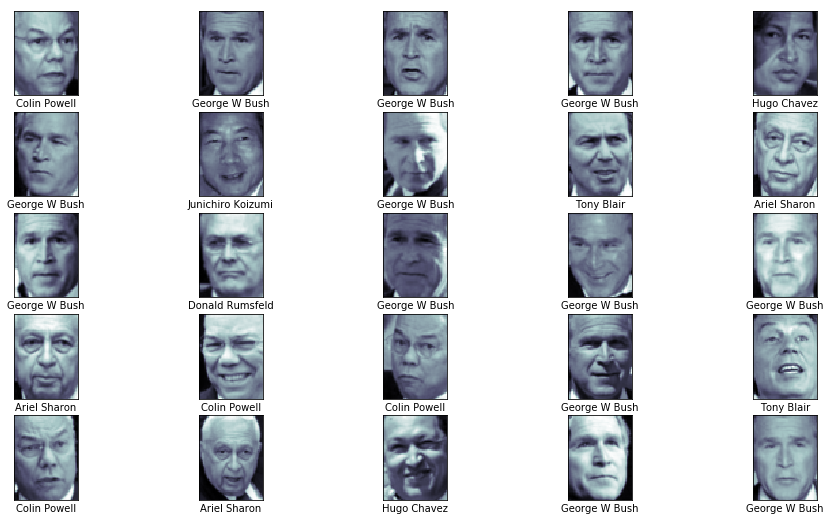

In [34]:
fig,ax=plt.subplots(5,5,figsize=(16,9))
for i,ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i],cmap='bone')
    ax_i.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

## Creacion del modelo

In [16]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

In [17]:
pca=RandomizedPCA(n_components=150,whiten=True,random_state=42)
svc=SVC(class_weight='balanced')
model=make_pipeline(pca,svc)

## Validacion Cruzada para SVM

In [20]:
from sklearn.cross_validation import train_test_split

In [21]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(faces.data,faces.target,random_state=42)

In [22]:
from sklearn.grid_search import GridSearchCV

In [25]:
param_grid = {
    "svc__C":[0.1,1,5,10,50], #valores de C
    "svc__gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01] #valores de gamma para las funciones radiales del kernel
}
grid = GridSearchCV(model, param_grid)

grid.fit(Xtrain, Ytrain)

%time 

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


In [37]:
grid.best_params_ #los mejores parametros

{'svc__C': 5, 'svc__gamma': 0.001}

## Prediccion

In [30]:
ypredict=grid.best_estimator_.predict(Xtest) #prediccion

Text(0.5,0.98,'Predicciones de las imágenes (incorrectas en rojo)')

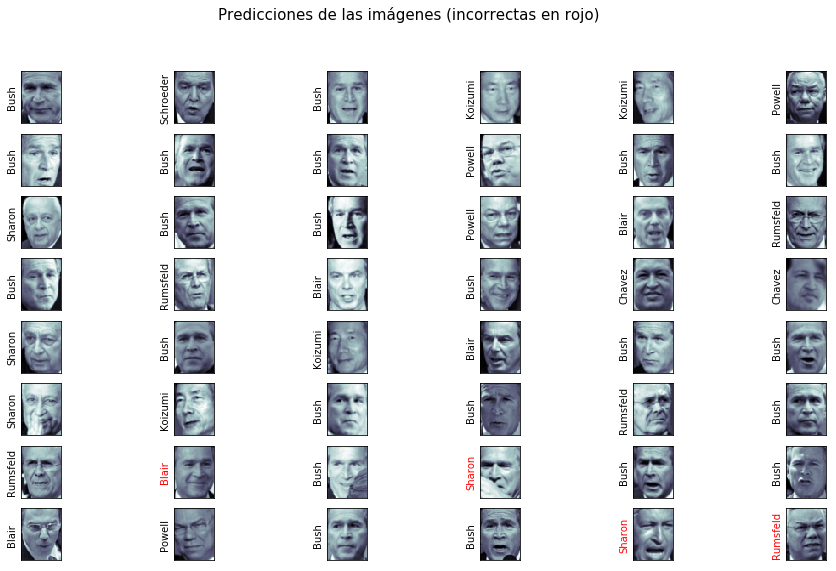

In [36]:
fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[ypredict[i]].split()[-1],
                   color = "black" if ypredict[i]==Ytest[i] else "red")

fig.suptitle("Predicciones de las imágenes (incorrectas en rojo)", size = 15)

## Reporte

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(Ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.87      0.72        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.72      0.84      0.78        31
    George W Bush       0.98      0.82      0.89       126
Gerhard Schroeder       0.75      0.78      0.77        23
      Hugo Chavez       0.88      0.75      0.81        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.85      0.95      0.90        42

      avg / total       0.87      0.85      0.85       337



## Matriz de confusion

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

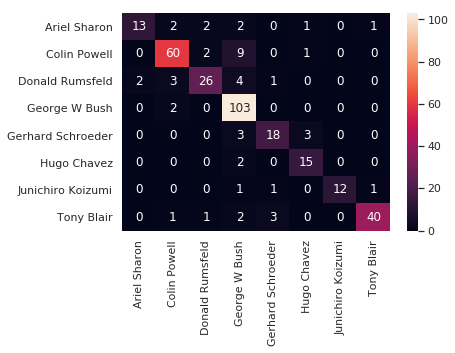

In [61]:
mat = confusion_matrix(Ytest, yfit)

sns.heatmap(mat.T,annot=True, fmt='d',xticklabels=faces.target_names, yticklabels=faces.target_names )